# **Actual delivery time Estimation**

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import scale

In [13]:
df = pd.read_csv('/content/Brazilian_dataset_EDA_Clustering.csv')
df_translate = pd.read_csv('/content/product_category_name_translation.csv')
df=df.reset_index(drop=True)

In [14]:
df_translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [17]:
df = pd.merge(df, df_translate, on='product_category_name')

In [18]:
df.head(5)

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_Score,RFM_Score_s,RFM_Level,clusters,product_category_name_english_y
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,2,62.23,1,2,2,212,5,Promising,4,housewares
1,1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,1,37.77,1,1,1,111,3,Require Activation,1,housewares
2,2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,1,37.77,1,1,1,111,3,Require Activation,1,housewares
3,3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,...,1,44.09,1,2,1,211,4,Needs Attention,1,housewares
4,4,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,...,1,356.12,1,2,4,214,7,Loyal,3,housewares


In [20]:
#DROP COLUMNS THAT ARE NOT NEEDED

df_regression = df[['order_id','product_id', 'customer_id', 'order_status', 'price', 'freight_value', 
         'order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date',
        'customer_state', 'product_description_lenght', 'product_photos_qty', 'review_score', 'product_category_name_english_y']]


In [21]:
df_regression.head()

,order_id,product_id,customer_id,order_status,price,freight_value,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_description_lenght,product_photos_qty,review_score,product_category_name_english_y
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,9ef432eb6251297304e76186b10a928d,delivered,29.99,8.72,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,2017-10-10 21:25:13,SP,268.0,4.0,1,housewares
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,a20e8105f23924cd00833fd87daa0831,delivered,29.99,7.78,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-28 00:00:00,2017-08-18 14:44:43,SP,268.0,4.0,1,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,26c7ac168e1433912a51b924fbd34d34,delivered,29.99,7.78,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-15 00:00:00,2017-08-07 18:30:01,SP,268.0,4.0,1,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,29.99,14.10,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-13 00:00:00,2017-11-07 18:04:59,SC,268.0,4.0,1,housewares
4,6ea2f835b4556291ffdc53fa0b3b95e8,be021417a6acb56b9b50d3fd2714baa8,c7340080e394356141681bd4c9b8fe31,delivered,339.00,17.12,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-21 00:00:00,2017-12-28 18:59:23,SP,664.0,6.0,0,housewares


### **Target Variable Creation : delivery Time**

In [22]:
df_regression['order_purchase_timestamp'] = pd.to_datetime(df_regression['order_purchase_timestamp'])
df_regression['order_approved_at'] = pd.to_datetime(df_regression['order_approved_at'])
df_regression['order_estimated_delivery_date'] = pd.to_datetime(df_regression['order_estimated_delivery_date'])
df_regression['order_delivered_customer_date'] = pd.to_datetime(df_regression['order_delivered_customer_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [23]:
# Days Estimated Delivery Time
df_regression['estimated_delivery_time'] = (df_regression.loc[:,'order_estimated_delivery_date'] - df_regression.loc[:,'order_approved_at'])
df_regression['estimated_delivery_time'] = df_regression['estimated_delivery_time'].dt.days
df_regression['estimated_delivery_time'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    15
1    12
2    12
3    18
4    25
Name: estimated_delivery_time, dtype: int64

In [24]:
# Days Actual Delivery Time
df_regression['actual_delivery_time'] = (df_regression.loc[:,'order_delivered_customer_date'] - df_regression.loc[:,'order_approved_at'])
df_regression['actual_delivery_time'] = df_regression['actual_delivery_time'].dt.days
df_regression['actual_delivery_time'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     8
1     2
2     4
3    13
4    33
Name: actual_delivery_time, dtype: int64

Only taking values greater than 0 as the least number of days it takes to deliver an order should be 1

In [25]:
df_regression = df_regression.loc[df_regression['estimated_delivery_time'] > 0]
df_regression = df_regression.loc[df_regression['actual_delivery_time'] > 0]

Dropping other datetime features

In [26]:
cols2drop = ['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date']
df_regression.drop(cols2drop, axis=1, inplace=True)
df_regression.head()

,order_id,product_id,customer_id,order_status,price,freight_value,customer_state,product_description_lenght,product_photos_qty,review_score,product_category_name_english_y,estimated_delivery_time,actual_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,9ef432eb6251297304e76186b10a928d,delivered,29.99,8.72,SP,268.0,4.0,1,housewares,15,8
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,a20e8105f23924cd00833fd87daa0831,delivered,29.99,7.78,SP,268.0,4.0,1,housewares,12,2
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,26c7ac168e1433912a51b924fbd34d34,delivered,29.99,7.78,SP,268.0,4.0,1,housewares,12,4
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,29.99,14.10,SC,268.0,4.0,1,housewares,18,13
4,6ea2f835b4556291ffdc53fa0b3b95e8,be021417a6acb56b9b50d3fd2714baa8,c7340080e394356141681bd4c9b8fe31,delivered,339.00,17.12,SP,664.0,6.0,0,housewares,25,33


Removing the features that will not be useful

In [27]:
del df_regression['order_id']
del df_regression['product_id']
del df_regression['customer_id']
del df_regression['order_status']

**correlation_matrix**

actual_delivery_time          1.000000
estimated_delivery_time       0.398991
freight_value                 0.211957
price                         0.062725
product_description_lenght    0.003891
product_photos_qty           -0.028210
review_score                 -0.337455
Name: actual_delivery_time, dtype: float64


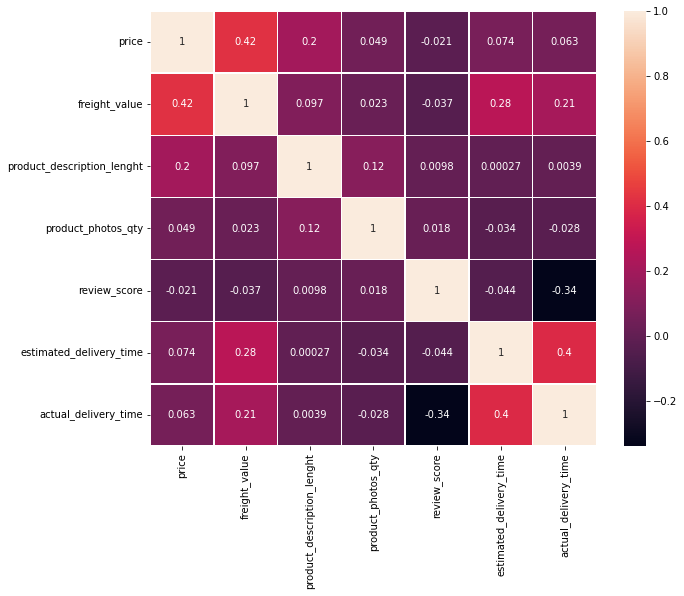

In [28]:
corr_matrix = df_regression.corr()
print(corr_matrix['actual_delivery_time'].sort_values(ascending=False))

fig, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(corr_matrix, annot = True, linewidths=.5, ax = ax)

**Ploting histogram of features**

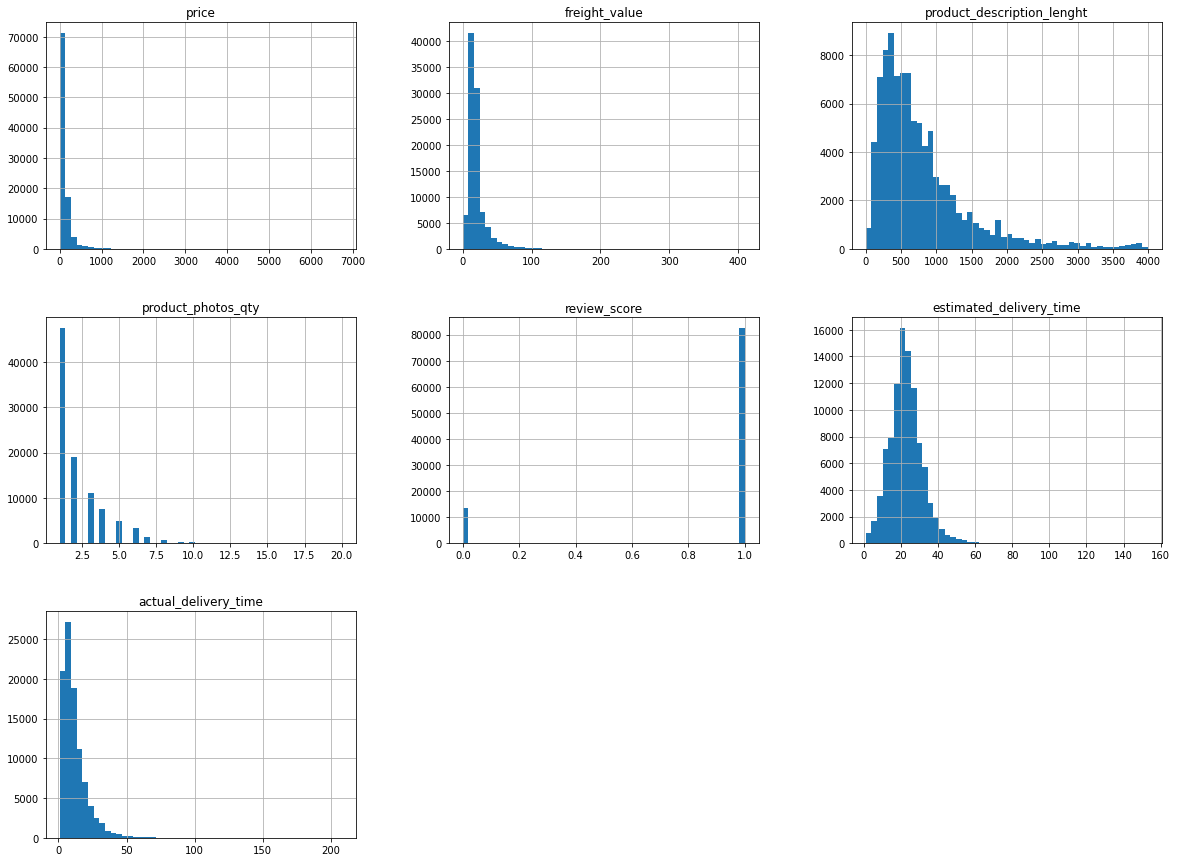

In [29]:
%matplotlib inline

df_regression.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Converting price to float and checking null values

In [30]:
df_regression['price'] = pd.to_numeric(df_regression['price'])
df_regression = df_regression[df_regression['price'].notnull()]

In [31]:
print("Skewness: \n",df_regression.skew(),"\n")
print("Kurtosis: \n",df_regression.kurtosis(),"\n")

Skewness: 
 price                         7.464575
freight_value                 5.588332
product_description_lenght    1.992794
product_photos_qty            1.859429
review_score                 -2.060140
estimated_delivery_time       0.992360
actual_delivery_time          3.660839
dtype: float64 

Kurtosis: 
 price                         103.574314
freight_value                  58.352095
product_description_lenght      4.839593
product_photos_qty              4.587948
review_score                    2.244223
estimated_delivery_time         5.306384
actual_delivery_time           35.979139
dtype: float64 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


**Performing Log transformation as data is skewed**

In [32]:
def  plot_feature(plot_1, plot_1_title, plot_2, plot_2_title):
  plt.figure(figsize=(12,10))

  plt.subplot(221)
  g = sns.distplot(plot_1)#df_regression['price']
  g.set_title( plot_1_title + "- Distribution", fontsize=15)
  g.set_xlabel("")
  g.set_ylabel("Frequency", fontsize=12)

  plt.subplot(222)
  g1 = sns.distplot(plot_2) #df_regression['freight_value']
  g1.set_title(plot_2_title + "- Distribution", fontsize=15)
  g1.set_xlabel("")
  g1.set_ylabel("Frequency", fontsize=12)

**Price and Freight value**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


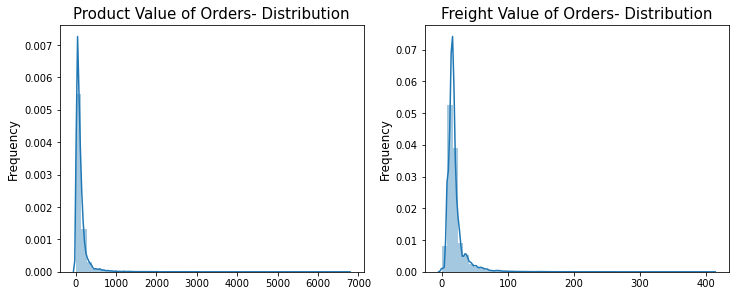

In [33]:
plot_feature(df_regression['price'], "Product Value of Orders", df_regression['freight_value'], "Freight Value of Orders")

In [34]:
df_regression['price'] = np.log1p(df_regression['price'])
df_regression['freight_value'] = np.log1p(df_regression['freight_value'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


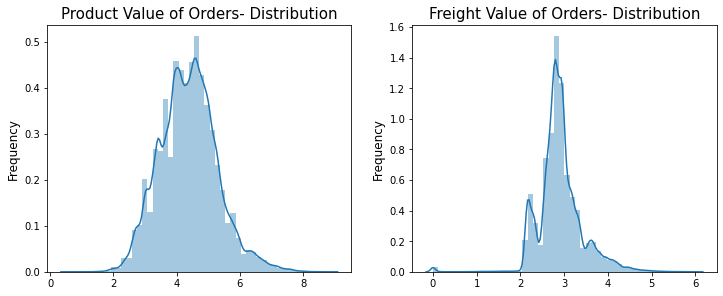

In [35]:
plot_feature(df_regression['price'], "Product Value of Orders", df_regression['freight_value'], "Freight Value of Orders")

**Estimated delivery date and actual delivery date**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


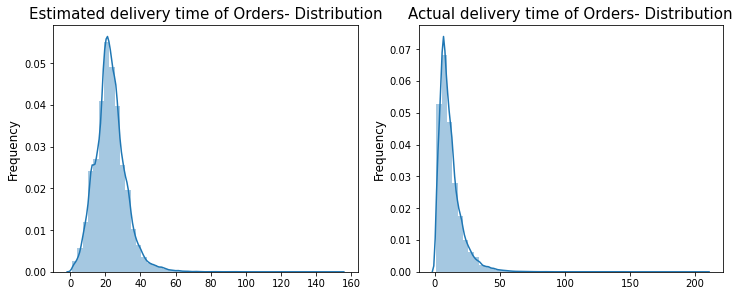

In [36]:
plot_feature(df_regression['estimated_delivery_time'], "Estimated delivery time of Orders", df_regression['actual_delivery_time'], "Actual delivery time of Orders")

In [37]:
df_regression['estimated_delivery_time'] = np.log1p(df_regression['estimated_delivery_time'])
df_regression['actual_delivery_time'] = np.log1p(df_regression['actual_delivery_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


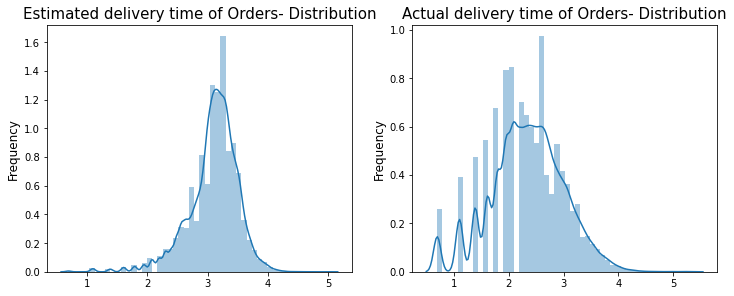

In [38]:
plot_feature(df_regression['estimated_delivery_time'], "Estimated delivery time of Orders", df_regression['actual_delivery_time'], "Actual delivery time of Orders")

In [39]:
print("Skewness: \n",df_regression.skew(),"\n")
print("Kurtosis: \n",df_regression.kurtosis(),"\n")

Skewness: 
 price                         0.316941
freight_value                 0.159494
product_description_lenght    1.992794
product_photos_qty            1.859429
review_score                 -2.060140
estimated_delivery_time      -1.032132
actual_delivery_time         -0.104538
dtype: float64 

Kurtosis: 
 price                         0.397671
freight_value                 5.286240
product_description_lenght    4.839593
product_photos_qty            4.587948
review_score                  2.244223
estimated_delivery_time       2.858334
actual_delivery_time          0.131633
dtype: float64 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


**Removing outliers**

**Actual delivery time**

In [40]:
def plot_outlier_features(data):
  sns.set(style="whitegrid")
  fig, ax = plt.subplots(figsize=(12,5))
  bxpt = sns.boxplot(x= data, ax=ax) #df_regression['actual_delivery_time']

  print(data.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

0.0    0.693147
0.1    1.386294
0.2    1.791759
0.3    2.079442
0.4    2.197225
0.5    2.302585
0.6    2.484907
0.7    2.708050
0.8    2.890372
0.9    3.178054
1.0    5.342334
Name: actual_delivery_time, dtype: float64


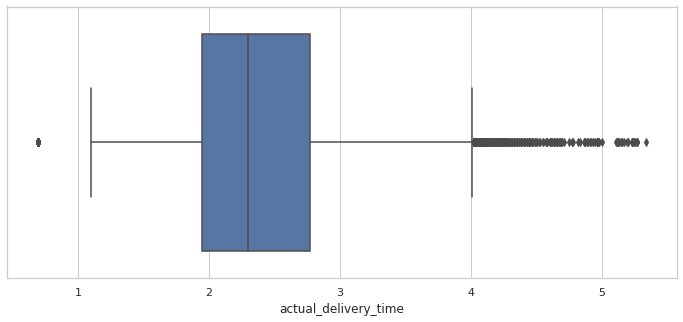

In [41]:
plot_outlier_features(df_regression['actual_delivery_time'])

In [42]:
def imputer(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    print('Lower bound: ', lower_bound)
    print('Upper bound: ', upper_bound)
    df_regression[col_name] = data[col_name].clip(lower_bound, upper_bound)
    return df_regression

In [43]:
df_regression = imputer(df_regression, 'actual_delivery_time')

Lower bound:  0.7058922892786115
Upper bound:  4.012606582016483


In [44]:
print(df_regression['actual_delivery_time'].min())
print(df_regression['actual_delivery_time'].max())

0.7058922892786115
4.012606582016483


0.0    0.705892
0.1    1.386294
0.2    1.791759
0.3    2.079442
0.4    2.197225
0.5    2.302585
0.6    2.484907
0.7    2.708050
0.8    2.890372
0.9    3.178054
1.0    4.012607
Name: actual_delivery_time, dtype: float64


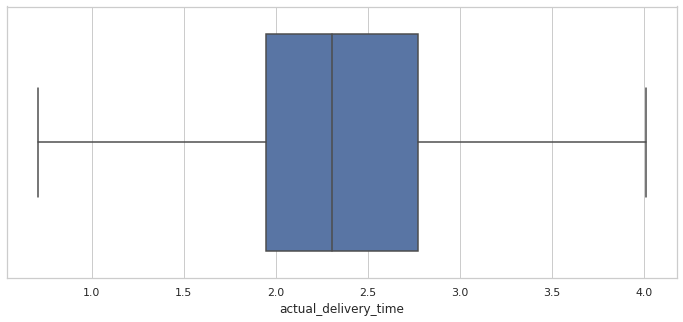

In [45]:
plot_outlier_features(df_regression['actual_delivery_time'])

No outliers after mean imputation. We did this because according to our ecommerce knowledge from google, delivery times for all the orders are the same approximately.

**estimated_delivery_time**

0.0    0.693147
0.1    2.564949
0.2    2.833213
0.3    2.995732
0.4    3.091042
0.5    3.135494
0.6    3.218876
0.7    3.295837
0.8    3.401197
0.9    3.526361
1.0    5.036953
Name: estimated_delivery_time, dtype: float64


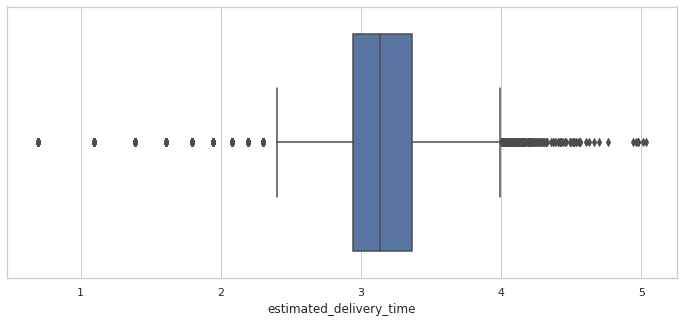

In [46]:
plot_outlier_features(df_regression['estimated_delivery_time'])

In [47]:
df_regression = imputer(df_regression, 'estimated_delivery_time')

Lower bound:  2.3101537029363897
Upper bound:  4.001581106216525


In [48]:
print(df_regression['estimated_delivery_time'].min())
print(df_regression['estimated_delivery_time'].max())

2.3101537029363897
4.001581106216525


0.0    2.310154
0.1    2.564949
0.2    2.833213
0.3    2.995732
0.4    3.091042
0.5    3.135494
0.6    3.218876
0.7    3.295837
0.8    3.401197
0.9    3.526361
1.0    4.001581
Name: estimated_delivery_time, dtype: float64


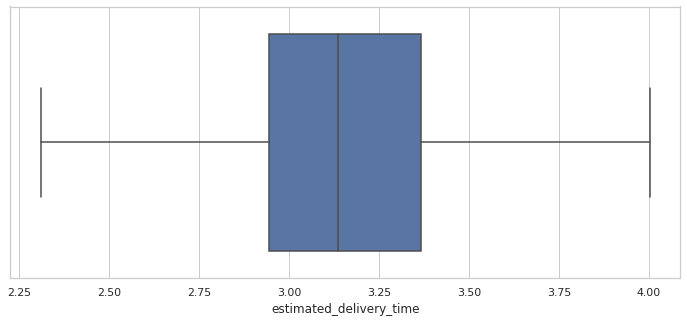

In [49]:
plot_outlier_features(df_regression['estimated_delivery_time'])

**Product Photo quality**

In [50]:
df_regression['product_photos_qty'] = df_regression['product_photos_qty'].round(0).astype(int)

0.0     1.0
0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     2.0
0.6     2.0
0.7     3.0
0.8     3.0
0.9     5.0
1.0    20.0
Name: product_photos_qty, dtype: float64


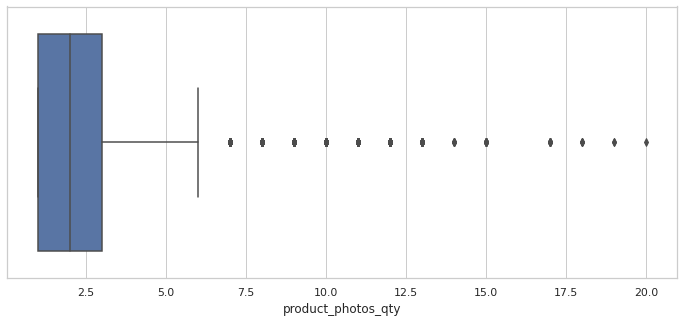

In [51]:
plot_outlier_features(df_regression['product_photos_qty'])

In [52]:
df_regression = imputer(df_regression, 'product_photos_qty')

Lower bound:  -2.0
Upper bound:  6.0


0.0    1.0
0.1    1.0
0.2    1.0
0.3    1.0
0.4    1.0
0.5    2.0
0.6    2.0
0.7    3.0
0.8    3.0
0.9    5.0
1.0    6.0
Name: product_photos_qty, dtype: float64


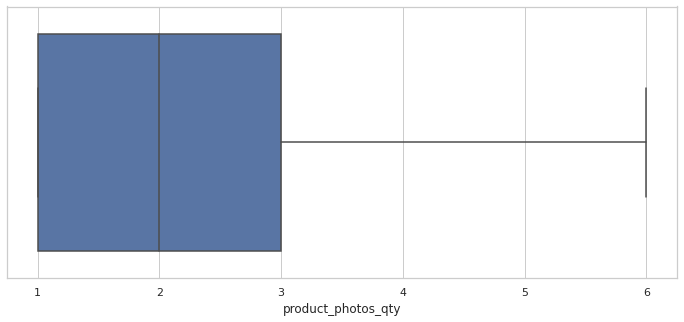

In [53]:
plot_outlier_features(df_regression['product_photos_qty'])

**Freight Value**

0.0    0.000000
0.1    2.297573
0.2    2.601207
0.3    2.714695
0.4    2.783776
0.5    2.856470
0.6    2.941804
0.7    3.021887
0.8    3.194173
0.9    3.560478
1.0    6.017814
Name: freight_value, dtype: float64


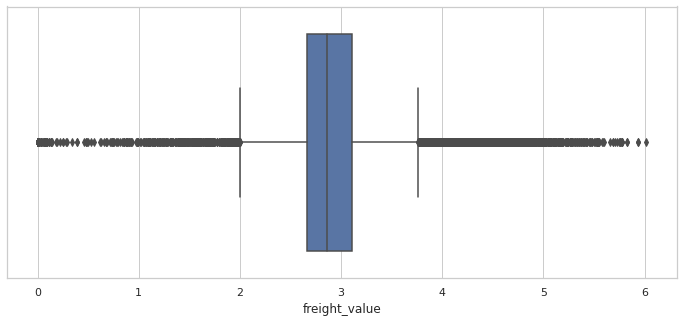

In [54]:
plot_outlier_features(df_regression['freight_value'])

In [55]:
df_regression = imputer(df_regression, 'freight_value')

Lower bound:  2.003167634417409
Upper bound:  3.7647204551859983


0.0    2.003168
0.1    2.297573
0.2    2.601207
0.3    2.714695
0.4    2.783776
0.5    2.856470
0.6    2.941804
0.7    3.021887
0.8    3.194173
0.9    3.560478
1.0    3.764720
Name: freight_value, dtype: float64


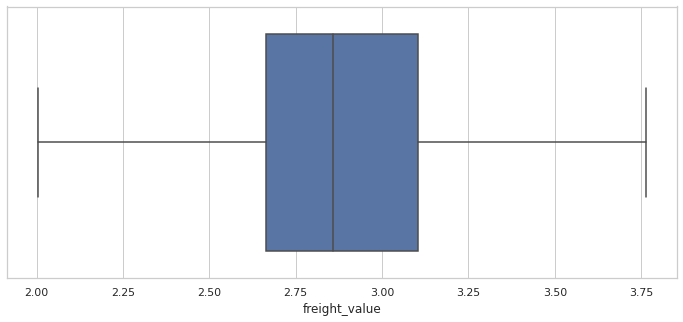

In [56]:
plot_outlier_features(df_regression['freight_value'])

Dividing customer state into 5 regions of Brazil

In [57]:
north = ['AC','AP','AM','PA','RO','RR','TO']
north_east = ['AL','BA','CE','MA','PB','PE','PI','RN','SE']
center_west = ['DF','GO','MT','MS']
south_east = ['ES','MG','RJ','SP']
south = ['PR','RS','SC']

In [58]:
df_regression.loc[df_regression['customer_state'].isin(north), 'customer_regions'] = 'north'
df_regression.loc[df_regression['customer_state'].isin(north_east), 'customer_regions'] = 'north_east'
df_regression.loc[df_regression['customer_state'].isin(center_west), 'customer_regions'] = 'center_west'
df_regression.loc[df_regression['customer_state'].isin(south_east), 'customer_regions'] = 'south_east'
df_regression.loc[df_regression['customer_state'].isin(south), 'customer_regions'] = 'south'

In [61]:
df_regression.head()

,price,freight_value,customer_state,product_description_lenght,product_photos_qty,review_score,product_category_name_english_y,estimated_delivery_time,actual_delivery_time,customer_regions
0,3.433665,2.274186,SP,268.0,4.0,1,housewares,2.772589,2.197225,south_east
1,3.433665,2.172476,SP,268.0,4.0,1,housewares,2.564949,1.098612,south_east
2,3.433665,2.172476,SP,268.0,4.0,1,housewares,2.564949,1.609438,south_east
3,3.433665,2.714695,SC,268.0,4.0,1,housewares,2.944439,2.639057,south
4,5.828946,2.897016,SP,664.0,6.0,0,housewares,3.258097,3.526361,south_east


Dividing product_category_name into category types

In [59]:
home_personal = ['bed_bath_table', 'housewares', 'food_drink', 'kitchen_dining_laundry_garden_furniture', 'home_confort', 'home_comfort_2', 
                 'food', 'christmas_supplies', 'drinks', 'health_beauty', 'bed_bath_table', 'perfumery', 'watches_gifts', 'flowers', 
                 'party_supplies', 'auto', 'pet_shop', 'cine_photo', 'la_cuisine']

entertainment_stationary = ['audio', 'books_technical', 'musical_instruments', 'books_general_interest', 'art', 'books_imported', 'music',
                              'arts_and_craftmanship', 'stationery', 'consoles_games', 'cool_stuff']

electronics_furniture = ['computers_accessories', 'furniture_decor', 'telephony', 'tablets_printing_image', 'fixed_telephony', 
                         'small_appliances', 'air_conditioning', 'office_furniture', 'electronics', 'home_appliances',
                         'furniture_living_room', 'home_construction', 'furniture_mattress_and_upholstery', 'furniture_bedroom',
                         'signaling_and_security', 'computers', 'home_appliances_2', 'small_appliances_home_oven_and_coffee', 
                         'cds_dvds_musicals', 'dvds_blu_ray', 'security_and_services']

garden_construction_idustry = ['garden_tools', 'construction_tools_construction', 'costruction_tools_garden', 'costruction_tools_tools',
                               'construction_tools_lights', 'construction_tools_safety', 'market_place',  'agro_industry_and_commerce',  
                               'industry_commerce_and_business',]

fashion_clothing = ['sports_leisure', 'baby', 'toys', 'fashion_bags_accessories', 'fashion_shoes', 'luggage_accessories',
                            'fashion_male_clothing', 'fashion_underwear_beach', 'fashion_sport', 'fashio_female_clothing',
                            'diapers_and_hygiene', 'fashion_childrens_clothes']

In [62]:
df_regression.loc[df_regression['product_category_name_english_y'].isin(home_personal), 'product_category_type'] = 'home_personal'
df_regression.loc[df_regression['product_category_name_english_y'].isin(entertainment_stationary), 'product_category_type'] = 'entertainment_stationary'
df_regression.loc[df_regression['product_category_name_english_y'].isin(electronics_furniture), 'product_category_type'] = 'electronics_furniture'
df_regression.loc[df_regression['product_category_name_english_y'].isin(garden_construction_idustry), 'product_category_type'] = 'garden_construction_idustry'
df_regression.loc[df_regression['product_category_name_english_y'].isin(fashion_clothing), 'product_category_type'] = 'fashion_clothing'

In [63]:
df_regression.head()

,price,freight_value,customer_state,product_description_lenght,product_photos_qty,review_score,product_category_name_english_y,estimated_delivery_time,actual_delivery_time,customer_regions,product_category_type
0,3.433665,2.274186,SP,268.0,4.0,1,housewares,2.772589,2.197225,south_east,home_personal
1,3.433665,2.172476,SP,268.0,4.0,1,housewares,2.564949,1.098612,south_east,home_personal
2,3.433665,2.172476,SP,268.0,4.0,1,housewares,2.564949,1.609438,south_east,home_personal
3,3.433665,2.714695,SC,268.0,4.0,1,housewares,2.944439,2.639057,south,home_personal
4,5.828946,2.897016,SP,664.0,6.0,0,housewares,3.258097,3.526361,south_east,home_personal


In [73]:
# Lets remove the columns that we have aggregated from: customer_state and product_category_name

df_regression = df_regression.drop(['customer_state','product_category_name_english_y'], axis=1)
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96282 entries, 0 to 96515
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       96282 non-null  float64
 1   freight_value               96282 non-null  float64
 2   product_description_lenght  96282 non-null  float64
 3   product_photos_qty          96282 non-null  float64
 4   review_score                96282 non-null  int64  
 5   estimated_delivery_time     96282 non-null  float64
 6   actual_delivery_time        96282 non-null  float64
 7   customer_regions            96282 non-null  object 
 8   product_category_type       96282 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.3+ MB


**Training and Testing data**

In [74]:
X = df_regression.iloc[:,:-1]
y = df_regression['actual_delivery_time']

In [75]:
X.columns

Index(['price', 'freight_value', 'product_description_lenght',
       'product_photos_qty', 'review_score', 'estimated_delivery_time',
       'actual_delivery_time', 'customer_regions'],
      dtype='object')

In [76]:
# turn X into dict
X_dict = X.to_dict(orient='records') # turn each row as key-value pairs
X_dict[0]

{'actual_delivery_time': 2.1972245773362196,
 'customer_regions': 'south_east',
 'estimated_delivery_time': 2.772588722239781,
 'freight_value': 2.2741856184723477,
 'price': 3.433664571799657,
 'product_description_lenght': 268.0,
 'product_photos_qty': 4.0,
 'review_score': 1}

In [77]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

dv_X = DictVectorizer(sparse=False) 
# sparse = False means the output is not a sparse matrix
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)
# show X_encoded
X_encoded

array([[  2.19722458,   0.        ,   0.        , ..., 268.        ,
          4.        ,   1.        ],
       [  1.09861229,   0.        ,   0.        , ..., 268.        ,
          4.        ,   1.        ],
       [  1.60943791,   0.        ,   0.        , ..., 268.        ,
          4.        ,   1.        ],
       ...,
       [  1.38629436,   0.        ,   0.        , ..., 660.        ,
          3.        ,   1.        ],
       [  2.99573227,   0.        ,   1.        , ..., 506.        ,
          1.        ,   1.        ],
       [  2.30258509,   1.        ,   0.        , ..., 461.        ,
          4.        ,   0.        ]])

In [78]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X_encoded, y, test_size = 0.3, random_state = 123)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(67397, 12) (28885, 12) (67397,) (28885,)


**Linear Regression**

In [79]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([3.55534806, 2.30258509, 2.19722458, ..., 1.09861229, 2.30258509,
       3.73766962])

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = regressor.predict(X_train)
y_pred_train
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE Train: ", rmse_train)
score_train = r2_score(y_train,y_pred_train)
print("Train score: ", score_train)

RMSE Train:  4.163428310936365e-13
Train score:  1.0


**RandomForestRegressor**

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=7).fit(X_train, y_train)
y_prediction = rfr.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = rfr.predict(X_train)
y_pred_train
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE Train: ", rmse_train)
score_train = r2_score(y_train,y_pred_train)
print("Train score: ", score_train)

RMSE Train:  0.0010560013688945562
Train score:  0.9999974182942815


**KNNRegressor**

In [98]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [99]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
pred=model.predict(X_test)

In [100]:
y_pred_train = model.predict(X_train)
y_pred_train
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE Train: ", rmse_train)
score_train = r2_score(y_train,y_pred_train)
print("Train score: ", score_train)

RMSE Train:  0.22929065318902356
Train score:  0.8782832136254148


**MLPRegressor**

In [89]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_prediction = regr.predict(X_test)

In [93]:
y_pred_train = regr.predict(X_train)
y_pred_train
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE Train: ", rmse_train)
score_train = r2_score(y_train,y_pred_train)
print("Train score: ", score_train)

RMSE Train:  0.028799910493034084
Train score:  0.9980797399336777


### **MullerLoop using same algorithms**

In [101]:
names = ["LinearRegression", "RandomForestRegressor", "neighbors", "MLPRegressor"]

In [102]:
regressors = [
    LinearRegression(),
    RandomForestRegressor(max_depth=7),
    neighbors.KNeighborsRegressor(n_neighbors = 3),
    MLPRegressor(random_state=1, max_iter=500)]

In [104]:
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, rgs in zip(names, regressors):
    rgs.fit(X_train, y_train)
    score = 100.0 * rgs.score(X_test, y_test)
    print('Regressor = %s, Score (test, accuracy) = %.2f,' %(name, score))
    
    if score > max_score:
        clf_best = rgs
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regressor = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regressor = LinearRegression, Score (test, accuracy) = 100.00,
Regressor = RandomForestRegressor, Score (test, accuracy) = 100.00,
Regressor = neighbors, Score (test, accuracy) = 72.99,
Regressor = MLPRegressor, Score (test, accuracy) = 99.81,
--------------------------------------------------------------------------------
Best --> Regressor = LinearRegression, Score (test, accuracy) = 100.00
